Data scientist is the sexiest job in the world. How many times have you heard that? Analytics India Annual Salary Study which aims to understand a wide range of trends data science says that the median analytics salary in India for the year 2017 is INR 12.7 Lakhs across all experience level and skill sets. So given the job description and other key information can you predict the range of salary of the job posting?

What kind of factors influence the salary of a data scientist? The study also says that in the world of analytics, Mumbai is the highest paymaster at almost 13.3 Lakhs per annum, followed by Bengaluru at 12.5 Lakhs. The industry of the data scientist can also influence the salary. Telecom industry pays the highest median salaries to its analytics professionals at 18.6 Lakhs. What are you waiting for, solve the problem by predicting how much a data scientist or analytics professional will be paid by analysing the data given. Bonus Tip: You can analyse the data and get key insights for your career as well.

The best data scientists and machine learning engineers will be given awesome prizes at the end of hackathon. Share this hackathon with a colleague who may be interested in mining the dataset for insights and make great predictions.

# Data

The dataset is based on salary and job postings in India across the internet. The train and the test data consists of attributes mentioned below. The rows of train dataset has rich amount of information regarding the job posting such as name of the designation and key skills required for the job.
The training data and test data comprise of 19802 samples and of 6601 samples each. This is a dataset which has been collected over some time to gather relevant analytics jobs posting over the years.

# Features

1. Name of the company (Encoded)
2. Years of experience
3. Job description
4. Job designation
5. Job Type
6. Key skills
7. Location
8. Salary in Rupees Lakhs(To be predicted)

# Problem Statement
Based on the given attributes and salary information, build a robust machine learning model that predicts the salary range of the salary post.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

# Reading the Train and test datasets

In [2]:
df= pd.read_csv("TrainDataset.csv")
dft= pd.read_csv("TestDataset.csv")

In [3]:
df.head()

,Unnamed: 0,experience,job_description,job_desig,job_type,key_skills,location,salary,company_name_encoded
0,17516,4-8 yrs,Experience of over 4 years in Analytics domain...,HR Talent Analytics & Insights Senior Analyst,Analytics,"Consulting, Business process, Outsourcing, Min...",Gurgaon,10to15,191
1,9949,4-8 yrs,Exploit and Vulnerability Researchers with the...,Sr. Exploit and Vulnerability Researchers,NaN,"research analysis, machine learning, software ...","Bengaluru, Pune",15to25,520
2,10225,2-5 yrs,Note: Candidate with knowledge of Clevertap wi...,Sr. Marketing Executive Opening @ Akbar Travel...,NaN,"marketing strategy, sales, market research, ca...",Mumbai(Mumbadevi Area),3to6,289
3,9893,2-7 yrs,NaN,Financial Planning & Analysis -- Bangalore,NaN,"Financial Planning, Finance",Bengaluru,6to10,4467
4,11848,3-8 yrs,Need candidates with experience in Natural lan...,Con / AM - Data Scientist,Analytics,"SAS, Statistical Modeling, SQL, Business Analy...",Bengaluru,10to15,3383


Removing the "Unnamed: 0" columns as it does not make any sense and will not help us

In [4]:
df=df.drop(columns="Unnamed: 0")
dft=dft.drop(columns="Unnamed: 0")

In [5]:
df.head()

,experience,job_description,job_desig,job_type,key_skills,location,salary,company_name_encoded
0,4-8 yrs,Experience of over 4 years in Analytics domain...,HR Talent Analytics & Insights Senior Analyst,Analytics,"Consulting, Business process, Outsourcing, Min...",Gurgaon,10to15,191
1,4-8 yrs,Exploit and Vulnerability Researchers with the...,Sr. Exploit and Vulnerability Researchers,NaN,"research analysis, machine learning, software ...","Bengaluru, Pune",15to25,520
2,2-5 yrs,Note: Candidate with knowledge of Clevertap wi...,Sr. Marketing Executive Opening @ Akbar Travel...,NaN,"marketing strategy, sales, market research, ca...",Mumbai(Mumbadevi Area),3to6,289
3,2-7 yrs,NaN,Financial Planning & Analysis -- Bangalore,NaN,"Financial Planning, Finance",Bengaluru,6to10,4467
4,3-8 yrs,Need candidates with experience in Natural lan...,Con / AM - Data Scientist,Analytics,"SAS, Statistical Modeling, SQL, Business Analy...",Bengaluru,10to15,3383


In [8]:
dft.head()

,experience,job_description,job_desig,job_type,key_skills,location,company_name_encoded
0,0-3 yrs,About Fototentia Diagnostics Private Limited :...,Project Manager/ Project Senior Engineer/ Proj...,NaN,"Project Management, Quality Control, Quality A...",Mumbai,1574
1,4-8 yrs,With rich experience delivering digital transf...,Opportunity for OAF Developer (4-8 yrs),NaN,"plsql, interfaces, oracle apps, oracle workflo...",Chennai(Okkiyam Thuraipakkam),541
2,15-20 yrs,Experience of a Customer Facing Role Pre sales...,Project Manager,NaN,"Solutioning, Sales, Presales, Project Manageme...",Hyderabad,4370
3,3-6 yrs,- Experience selling subscription based licens...,Enterprise Sales Manager - Online Learning Pla...,NaN,"Enterprise Sales, Business Development, Market...",Delhi,3931
4,2-5 yrs,Advanced Excel and MS access experience and ab...,"Great Opportunity_advance Excel,macros, Pivot ...",NaN,"Advanced Excel, SQL, VBA, Macros, MS Access, w...",Bengaluru,4893


# Checking for null Values in the dataset:

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15841 entries, 0 to 15840
Data columns (total 8 columns):
experience              15841 non-null object
job_description         12261 non-null object
job_desig               15841 non-null object
job_type                3830 non-null object
key_skills              15841 non-null object
location                15841 non-null object
salary                  15841 non-null object
company_name_encoded    15841 non-null int64
dtypes: int64(1), object(7)
memory usage: 990.1+ KB


We see that "job_description" and "job_type" have have null entries.

In [10]:
df.isnull().sum()

experience                  0
job_description          3580
job_desig                   0
job_type                12011
key_skills                  0
location                    0
salary                      0
company_name_encoded        0
dtype: int64

In [11]:
df.job_description.describe()

count                                                 12261
unique                                                 7838
top       Accenture Technology powers our clients busine...
freq                                                    112
Name: job_description, dtype: object

In [12]:
df.job_desig.describe()

count                15841
unique               10143
top       Business Analyst
freq                   120
Name: job_desig, dtype: object

In [13]:
df.job_type.describe()

count          3830
unique            5
top       Analytics
freq           2990
Name: job_type, dtype: object

In [14]:
df.job_type.value_counts()

Analytics    2990
analytics     729
ANALYTICS      67
analytic       28
Analytic       16
Name: job_type, dtype: int64

In [15]:
df.key_skills.describe()  

count                                                 15841
unique                                                11130
top       part time, freelancing, data entry, present jo...
freq                                                     65
Name: key_skills, dtype: object

In [16]:
df.company_name_encoded.describe()  

count    15841.000000
mean      2377.291775
std       1473.668458
min          1.000000
25%       1071.000000
50%       2217.000000
75%       3616.000000
max       5034.000000
Name: company_name_encoded, dtype: float64

In [17]:
df.location.describe()

count         15841
unique         1351
top       Bengaluru
freq           3313
Name: location, dtype: object

In [18]:
df.salary.value_counts()

10to15    3637
15to25    3251
6to10     2870
0to3      2587
3to6      2247
25to50    1249
Name: salary, dtype: int64

In [89]:
df.salary.value_counts()

1    3637
2    3251
5    2870
0    2587
4    2247
3    1249
Name: salary, dtype: int64

In [19]:
df.experience.describe()

count        15841
unique         125
top       5-10 yrs
freq          1019
Name: experience, dtype: object

In [20]:
df.company_name_encoded.describe()

count    15841.000000
mean      2377.291775
std       1473.668458
min          1.000000
25%       1071.000000
50%       2217.000000
75%       3616.000000
max       5034.000000
Name: company_name_encoded, dtype: float64

After analysing all the columns and target variable ..we will be droping this columns "job_description","job_desig","job_type" as they have the text values .so we will not be using these columns and also the dataset will not be having any null values

In [21]:
df=df.drop(columns=["job_description","job_desig","job_type"])
dft=dft.drop(columns=["job_description","job_desig","job_type"])

-Here we have plotted count plot where we get to know the counts of the multiple classes we have in target variable “Salary”. 
-As it’s a real world data we see that data is imbalanced.

<Figure size 720x360 with 0 Axes>

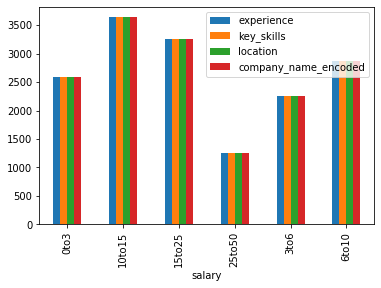

In [22]:
fig= plt.figure(figsize=(10,5))
df.groupby("salary").count().plot.bar()

In [23]:
df.head()

,experience,key_skills,location,salary,company_name_encoded
0,4-8 yrs,"Consulting, Business process, Outsourcing, Min...",Gurgaon,10to15,191
1,4-8 yrs,"research analysis, machine learning, software ...","Bengaluru, Pune",15to25,520
2,2-5 yrs,"marketing strategy, sales, market research, ca...",Mumbai(Mumbadevi Area),3to6,289
3,2-7 yrs,"Financial Planning, Finance",Bengaluru,6to10,4467
4,3-8 yrs,"SAS, Statistical Modeling, SQL, Business Analy...",Bengaluru,10to15,3383


-We will now be splitting the “experience” columns in “Exp_low” and “Exp_high”. So that the machine will be able understand it better and drop the “experience” column.

In [24]:
df[['Exp_low','Exp_high']] = df.experience.str.split("-",expand=True)
dft[['Exp_low','Exp_high']] = dft.experience.str.split("-",expand=True)

In [25]:
df['Exp_high'] = df.Exp_high.str.split("yrs",expand=True)
dft['Exp_high'] = df.Exp_high.str.split("yrs",expand=True)

In [26]:
df=df.drop(columns="experience")
dft=dft.drop(columns="experience")

In [27]:
df.head()

,key_skills,location,salary,company_name_encoded,Exp_low,Exp_high
0,"Consulting, Business process, Outsourcing, Min...",Gurgaon,10to15,191,4,8
1,"research analysis, machine learning, software ...","Bengaluru, Pune",15to25,520,4,8
2,"marketing strategy, sales, market research, ca...",Mumbai(Mumbadevi Area),3to6,289,2,5
3,"Financial Planning, Finance",Bengaluru,6to10,4467,2,7
4,"SAS, Statistical Modeling, SQL, Business Analy...",Bengaluru,10to15,3383,3,8


As there are multiple skills in the each of the value in "key_skills" columns seperated by ",".So to know the count of skills of each value we get max counts from the columns to further split the columns.

In [28]:
df['key_skill_len']=df.key_skills.apply(lambda x:len(x.split(",")))

In [29]:
df['key_skill_len'].max()

12

In [30]:
df.head()

,key_skills,location,salary,company_name_encoded,Exp_low,Exp_high,key_skill_len
0,"Consulting, Business process, Outsourcing, Min...",Gurgaon,10to15,191,4,8,6
1,"research analysis, machine learning, software ...","Bengaluru, Pune",15to25,520,4,8,3
2,"marketing strategy, sales, market research, ca...",Mumbai(Mumbadevi Area),3to6,289,2,5,5
3,"Financial Planning, Finance",Bengaluru,6to10,4467,2,7,2
4,"SAS, Statistical Modeling, SQL, Business Analy...",Bengaluru,10to15,3383,3,8,5


- After looking at the “key_skills” column we see that each entries has multiple skills separated by “,”. To make it better we will be splitting this entries to multiple columns as “key_skills1”, 2 and so on. And drop the “key_skills” columns after splitting.

In [31]:
df[['key_skills1',"key_skills2","key_skills3","key_skills4","key_skills5","key_skills6","key_skills7","key_skills8","key_skills9","key_skills10","key_skills11","key_skills12"]] = df.key_skills.str.split(",",expand=True)
dft[['key_skills1',"key_skills2","key_skills3","key_skills4","key_skills5","key_skills6","key_skills7","key_skills8","key_skills9","key_skills10","key_skills11","key_skills12"]] = dft.key_skills.str.split(",",expand=True)

In [32]:
df.head()

,key_skills,location,salary,company_name_encoded,Exp_low,Exp_high,key_skill_len,key_skills1,key_skills2,key_skills3,key_skills4,key_skills5,key_skills6,key_skills7,key_skills8,key_skills9,key_skills10,key_skills11,key_skills12
0,"Consulting, Business process, Outsourcing, Min...",Gurgaon,10to15,191,4,8,6,Consulting,Business process,Outsourcing,Mining,QlikView,Python...,None,None,None,None,None,None
1,"research analysis, machine learning, software ...","Bengaluru, Pune",15to25,520,4,8,3,research analysis,machine learning,software development...,None,None,None,None,None,None,None,None,None
2,"marketing strategy, sales, market research, ca...",Mumbai(Mumbadevi Area),3to6,289,2,5,5,marketing strategy,sales,market research,campaigns,marketing automation...,None,None,None,None,None,None,None
3,"Financial Planning, Finance",Bengaluru,6to10,4467,2,7,2,Financial Planning,Finance,None,None,None,None,None,None,None,None,None,None
4,"SAS, Statistical Modeling, SQL, Business Analy...",Bengaluru,10to15,3383,3,8,5,SAS,Statistical Modeling,SQL,Business Analytics,Statistical Analysis...,None,None,None,None,None,None,None


In [33]:
df.key_skills11.value_counts()

...            11
 MHRD...        3
 mca...         2
 AWS            2
 Avro...        2
 MR...          2
 HDFS...        1
 Storm...       1
 content...     1
Name: key_skills11, dtype: int64

# Cleaning the data:

We will be cleaning the unwanted noise data  like "..." and filling the empty cells with "None" 

In [34]:
cols = ['key_skills1',"key_skills2","key_skills3","key_skills4","key_skills5","key_skills6","key_skills7","key_skills8","key_skills9","key_skills10","key_skills11","key_skills12"]
for col in cols:
    df[col] = df[col].map(lambda x: str(x).lstrip('...').rstrip('...'))

In [35]:
cols = ['key_skills1',"key_skills2","key_skills3","key_skills4","key_skills5","key_skills6","key_skills7","key_skills8","key_skills9","key_skills10","key_skills11","key_skills12"]
for col in cols:
    dft[col] = dft[col].map(lambda x: str(x).lstrip('...').rstrip('...'))

In [36]:
df.key_skills11.value_counts()

None        15816
               11
 MHRD           3
 mca            2
 AWS            2
 Avro           2
 MR             2
 HDFS           1
 content        1
 Storm          1
Name: key_skills11, dtype: int64

In [37]:
nan_value = "None"
df.replace("", nan_value, inplace=True)

In [38]:
nan_value = "None"
dft.replace("", nan_value, inplace=True)

In [39]:
df.head(2)

,key_skills,location,salary,company_name_encoded,Exp_low,Exp_high,key_skill_len,key_skills1,key_skills2,key_skills3,key_skills4,key_skills5,key_skills6,key_skills7,key_skills8,key_skills9,key_skills10,key_skills11,key_skills12
0,"Consulting, Business process, Outsourcing, Min...",Gurgaon,10to15,191,4,8,6,Consulting,Business process,Outsourcing,Mining,QlikView,Python,None,None,None,None,None,None
1,"research analysis, machine learning, software ...","Bengaluru, Pune",15to25,520,4,8,3,research analysis,machine learning,software development,None,None,None,None,None,None,None,None,None


In [40]:
df=df.drop(columns="key_skills")
dft=dft.drop(columns="key_skills")

In [41]:
df.head(2)

,location,salary,company_name_encoded,Exp_low,Exp_high,key_skill_len,key_skills1,key_skills2,key_skills3,key_skills4,key_skills5,key_skills6,key_skills7,key_skills8,key_skills9,key_skills10,key_skills11,key_skills12
0,Gurgaon,10to15,191,4,8,6,Consulting,Business process,Outsourcing,Mining,QlikView,Python,None,None,None,None,None,None
1,"Bengaluru, Pune",15to25,520,4,8,3,research analysis,machine learning,software development,None,None,None,None,None,None,None,None,None


In [42]:
# will be droping the col as the will not be helpfull now ...
df=df.drop(columns=["key_skill_len","key_skills12"]) 
dft=dft.drop(columns=["key_skills12"]) 

In [43]:
df.head(2)

,location,salary,company_name_encoded,Exp_low,Exp_high,key_skills1,key_skills2,key_skills3,key_skills4,key_skills5,key_skills6,key_skills7,key_skills8,key_skills9,key_skills10,key_skills11
0,Gurgaon,10to15,191,4,8,Consulting,Business process,Outsourcing,Mining,QlikView,Python,None,None,None,None,None
1,"Bengaluru, Pune",15to25,520,4,8,research analysis,machine learning,software development,None,None,None,None,None,None,None,None


# Converting the data into suitable format by using LabelEncoder 
We will be transform all the columns using label encoding technique which help the machine to predict better

In [44]:
from sklearn.preprocessing import LabelEncoder

In [45]:
lb= LabelEncoder()

In [46]:
df["salary"]=lb.fit_transform(df["salary"])

In [47]:
cols = ['key_skills1',"key_skills2","key_skills3","key_skills4","key_skills5","key_skills6","key_skills7","key_skills8","key_skills9","key_skills10","key_skills11"]
for i in cols:
    df[i]=lb.fit_transform(df[i])

In [48]:
cols = ['key_skills1',"key_skills2","key_skills3","key_skills4","key_skills5","key_skills6","key_skills7","key_skills8","key_skills9","key_skills10","key_skills11"]
for i in cols:
    dft[i]=lb.fit_transform(dft[i])

In [49]:
location = np.append(df['location'].values, dft['location'].values, axis=0)
location

array(['Gurgaon', 'Bengaluru, Pune', 'Mumbai(Mumbadevi Area)', ...,
       'Bengaluru', 'Saudi Arabia', 'Bengaluru, Chennai'], dtype=object)

In [50]:
location.shape

(19802,)

In [51]:
lb=LabelEncoder()
lb.fit(list(set(location)))
df['location']=lb.transform(df['location'])
dft['location']=lb.transform(dft['location'])

In [52]:
total_comp_encod = np.append(df['company_name_encoded'].values, dft['company_name_encoded'].values, axis=0)
lb.fit(list(set(total_comp_encod)))
df['company_name_encoded']=lb.transform(df['company_name_encoded'])
dft['company_name_encoded']=lb.transform(dft['company_name_encoded'])

In [53]:
df.columns

Index(['location', 'salary', 'company_name_encoded', 'Exp_low', 'Exp_high',
       'key_skills1', 'key_skills2', 'key_skills3', 'key_skills4',
       'key_skills5', 'key_skills6', 'key_skills7', 'key_skills8',
       'key_skills9', 'key_skills10', 'key_skills11'],
      dtype='object')

In [54]:
df.head()

,location,salary,company_name_encoded,Exp_low,Exp_high,key_skills1,key_skills2,key_skills3,key_skills4,key_skills5,key_skills6,key_skills7,key_skills8,key_skills9,key_skills10,key_skills11
0,811,1,191,4,8,450,309,1563,1339,1325,791,981,506,228,95,8
1,337,2,520,4,8,3288,3231,4084,4076,3066,1818,981,506,228,95,8
2,1077,4,289,2,5,2984,3702,3471,2610,2489,1818,981,506,228,95,8
3,114,5,4467,2,7,759,791,4390,4076,3066,1818,981,506,228,95,8
4,114,1,3383,3,8,1731,2032,1989,271,1610,1818,981,506,228,95,8


# Building The models 

In [55]:
x = df[['location','company_name_encoded', 'Exp_low', 'Exp_high',
       'key_skills1', 'key_skills2', 'key_skills3', 'key_skills4',
       'key_skills5', 'key_skills6', 'key_skills7', 'key_skills8',
       'key_skills9', 'key_skills10', 'key_skills11']]
y = df['salary']

In [56]:
x.shape
y.shape

(15841,)

# Train Test Split of the Training dataset

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 0)

In [59]:
x_train.shape , x_test.shape

((11088, 15), (4753, 15))

In [60]:
y_train.shape , y_test.shape

((11088,), (4753,))

# Logistic Regression Model

In [61]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

In [62]:
log.fit(x_train,y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
y_predtest =log.predict(x_test)

# Evaluating the metrics of the Logistic regression model

In [65]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_predtest))

0.39006942983378917


In [66]:
from sklearn.metrics import confusion_matrix 
print('Confusion matrix:\n', confusion_matrix(y_test, y_predtest))

Confusion matrix:
 [[602  74  17   0  49  48]
 [123 496 317  12  14 109]
 [ 56 373 455  31   2  59]
 [  4  56 223  46   1  15]
 [294 162  26   2  64 112]
 [194 372 108   3  43 191]]


In [67]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predtest))

              precision    recall  f1-score   support

           0       0.47      0.76      0.58       790
           1       0.32      0.46      0.38      1071
           2       0.40      0.47      0.43       976
           3       0.49      0.13      0.21       345
           4       0.37      0.10      0.15       660
           5       0.36      0.21      0.26       911

    accuracy                           0.39      4753
   macro avg       0.40      0.36      0.34      4753
weighted avg       0.39      0.39      0.36      4753



In [69]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log,x_train, y_train, cv=6)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be ch

In [70]:
scores.mean()

0.38419820144486216

# Random Forest Model

In [71]:
from sklearn.ensemble import RandomForestClassifier
rft=RandomForestClassifier(n_estimators=200)
rft.fit(x_train, y_train)
rftpred=rft.predict(x_test)

# Evaluating the metrics of the Random Forest model

In [72]:
 print(accuracy_score(y_test,rftpred))

0.38480959394066905


In [74]:
from sklearn.metrics import accuracy_score, confusion_matrix 
print('Confusion matrix_test:\n', confusion_matrix(y_test, rftpred))

Confusion matrix_test:
 [[530  51  16   3 123  67]
 [ 48 401 348  29  62 183]
 [ 22 355 367 119  27  86]
 [  2  26 140 165   3   9]
 [226  86  27   2 153 166]
 [ 99 292 152   7 148 213]]


In [76]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rftpred))

              precision    recall  f1-score   support

           0       0.57      0.67      0.62       790
           1       0.33      0.37      0.35      1071
           2       0.35      0.38      0.36       976
           3       0.51      0.48      0.49       345
           4       0.30      0.23      0.26       660
           5       0.29      0.23      0.26       911

    accuracy                           0.38      4753
   macro avg       0.39      0.39      0.39      4753
weighted avg       0.38      0.38      0.38      4753



# LinearSVC model

In [81]:
from sklearn.svm import LinearSVC

In [82]:
SVC = LinearSVC()
SVC.fit(x_train, y_train)
y_pred_SVC = SVC.predict(x_test)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


# Evaluating the metrics of the LinearSVC model¶

In [83]:
 print(accuracy_score(y_test,y_pred_SVC))

0.24468756574794867


In [84]:
from sklearn.metrics import confusion_matrix 
print('Confusion matrix_test:\n', confusion_matrix(y_test, y_pred_SVC))

Confusion matrix_test:
 [[ 18 230 398   0 129  15]
 [  0 270 720   0  69  12]
 [  0 240 704   1  26   5]
 [  0  66 272   1   6   0]
 [  2 184 312   0 133  29]
 [  2 224 507   0 141  37]]


In [85]:
print(classification_report(y_test, y_pred_SVC))

              precision    recall  f1-score   support

           0       0.82      0.02      0.04       790
           1       0.22      0.25      0.24      1071
           2       0.24      0.72      0.36       976
           3       0.50      0.00      0.01       345
           4       0.26      0.20      0.23       660
           5       0.38      0.04      0.07       911

    accuracy                           0.24      4753
   macro avg       0.40      0.21      0.16      4753
weighted avg       0.38      0.24      0.18      4753



After comparing all the models we see that logistic regression show good results than all..So we will using this model for predicting on text dataset

# Saving Prediction of test dataset to csv file

In [86]:
dft.columns

Index(['location', 'company_name_encoded', 'Exp_low', 'Exp_high',
       'key_skills1', 'key_skills2', 'key_skills3', 'key_skills4',
       'key_skills5', 'key_skills6', 'key_skills7', 'key_skills8',
       'key_skills9', 'key_skills10', 'key_skills11'],
      dtype='object')

In [87]:
X = dft.iloc[:, :15].values
y_predtest =log.predict(X)

In [88]:
y_predtest

array([2, 2, 3, ..., 2, 1, 1])

In [90]:
file=pd.DataFrame({'company_name_encoded':dft.company_name_encoded,'salary':y_predtest})
file.salary.replace(0,'0to3',inplace=True)
file.salary.replace(1,'10to15',inplace=True)
file.salary.replace(2,'15to25',inplace=True)
file.salary.replace(3,'25to50',inplace=True)
file.salary.replace(4,'3to6',inplace=True)
file.salary.replace(5,'6to10',inplace=True)

In [92]:
file.head()

,company_name_encoded,salary
0,1574,15to25
1,541,15to25
2,4370,25to50
3,3931,15to25
4,4893,15to25


In [93]:
file.head()
file.to_csv('submissionDSnew.csv',index=False)